### Import Necessary Library

In [443]:
import pandas as pd
import numpy as np

############### Data Visualisation #################
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

################## Machine Learning ############
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

### Load and explore the data

In [444]:
data =pd.read_csv(r"C:\Users\chaud\Desktop\a\Logistic Regression using Python\xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [445]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [446]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
raisedhands,480.0,46.775000,30.779223,0.0,15.75,50.0,75.0,100.0
VisITedResources,480.0,54.797917,33.080007,0.0,20.00,65.0,84.0,99.0
AnnouncementsView,480.0,37.918750,26.611244,0.0,14.00,33.0,58.0,98.0
Discussion,480.0,43.283333,27.637735,1.0,20.00,39.0,70.0,99.0


In [447]:
data.describe(include="object")

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


In [448]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [449]:
data_cat =data[data.select_dtypes(include=["object"]).columns.tolist()]
data_cat.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


In [450]:
data_num=data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


### Question:-1
Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

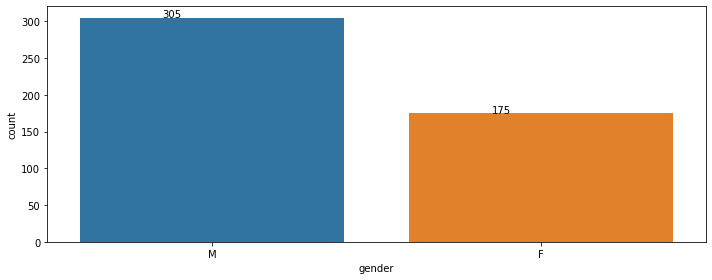

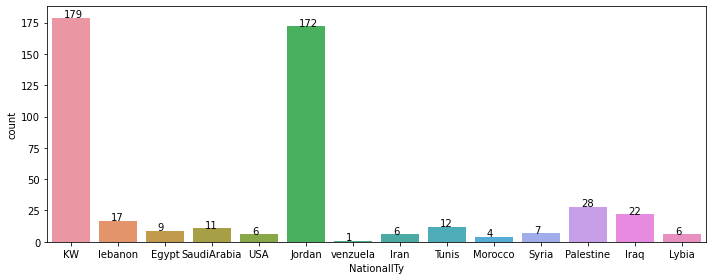

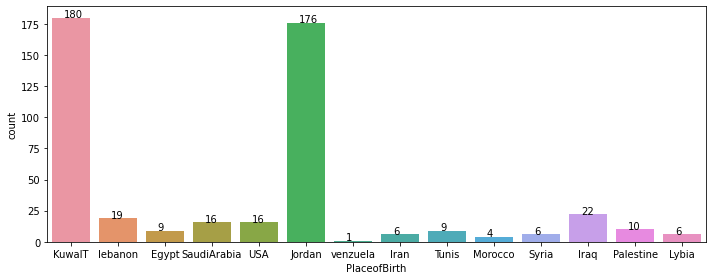

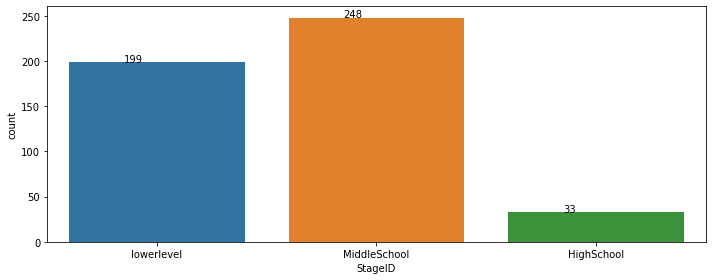

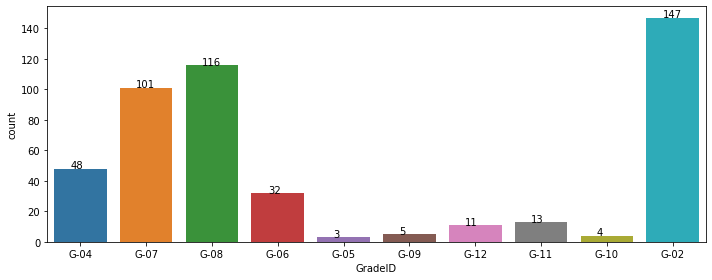

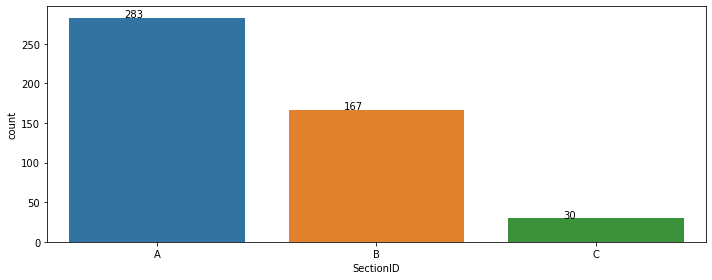

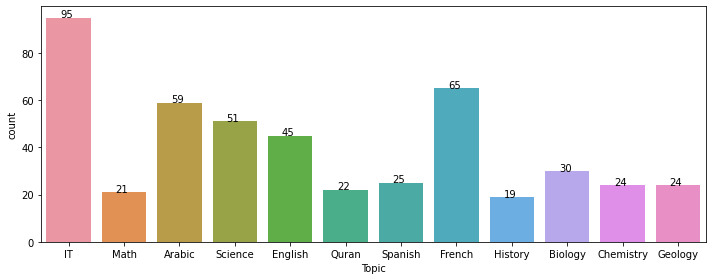

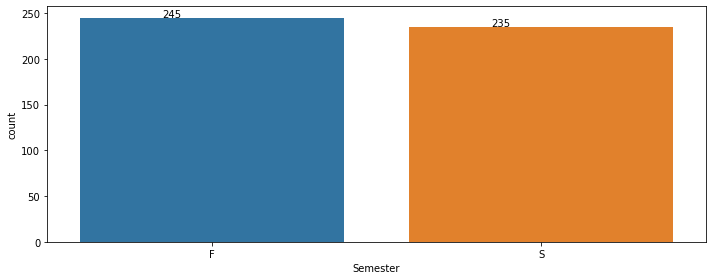

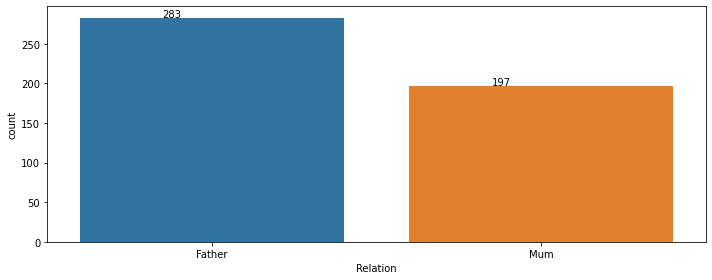

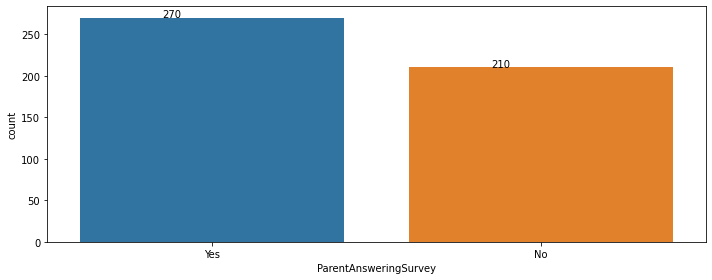

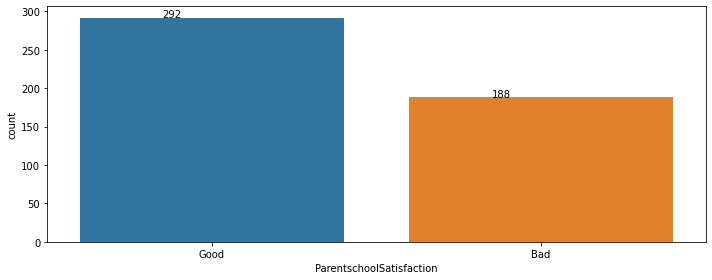

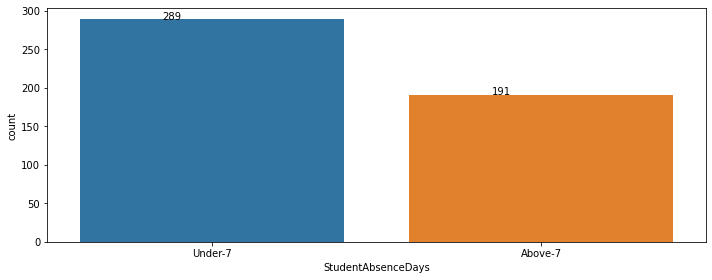

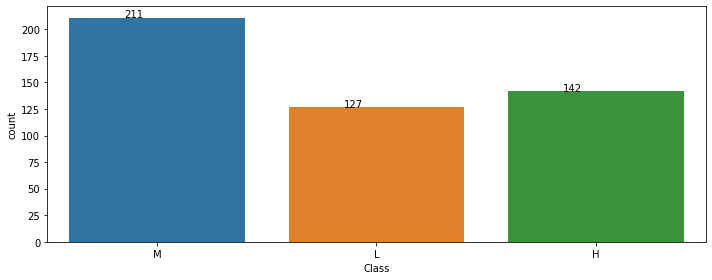

In [451]:
plt.rcParams["figure.figsize"] = [10,4]
plt.rcParams["figure.autolayout"] = True
for i in data_cat.columns:
    ax = sns.countplot(x=i, data=data_cat)

    for p in ax.patches:
    
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.1))
    plt.show()

### Inside:-
1. There is higher percentage of Male in the data as compared to the Female.
2. In the data most of the student are from Kuwate and jordan Country.
3. IT student is high as followed by french learning student.
4. In the data father parent is responding more for student as compared to Mother parent.
5. The grade score by the student is given by category low,middel and high and it seems the grade score by student is low and high are nearly equal number of student.

### Question:-2
Look at some categorical features in relation to each other, to see what insights could be possibly read?

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

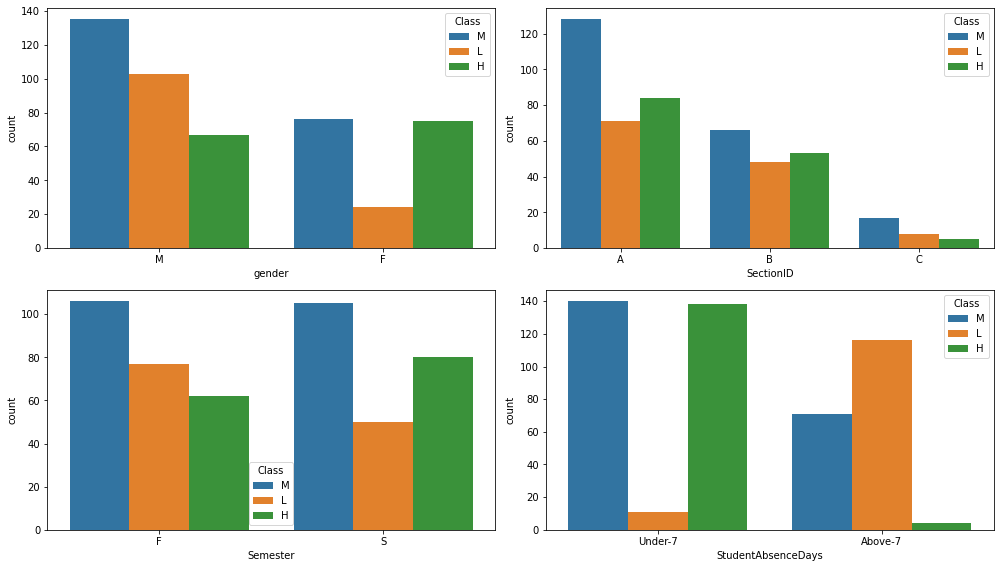

In [452]:
f,axes =plt.subplots(2,2,figsize=(14,8))
sns.countplot(x ="gender", hue="Class", data =data_cat, ax =axes[0,0])
sns.countplot(x ="SectionID", hue="Class", data =data_cat, ax =axes[0,1])
sns.countplot(x ="Semester", hue="Class", data =data_cat, ax =axes[1,0])
sns.countplot(x ="StudentAbsenceDays", hue="Class", data =data_cat, ax =axes[1,1])

posx and posy should be finite values
posx and posy should be finite values


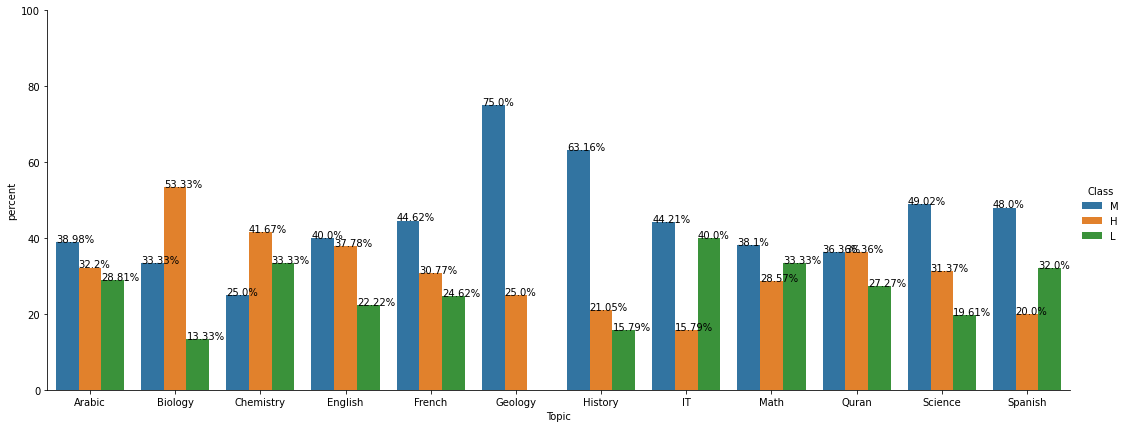

In [453]:
x,y ="Topic","Class"
df1 =data_cat.groupby(x)[y].value_counts(normalize=True)
df1 =df1.mul(100)
df1 =df1.rename("percent").reset_index()
g =sns.catplot(x=x, y="percent",hue=y, kind="bar",data=df1,height=6,aspect=2.5)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt =str(p.get_height().round(2)) +"%"
    txt_x =p.get_x()
    txt_y =p.get_height()
    g.ax.text(txt_x,txt_y,txt)

### Inside :-
1. Female score high grade point as compared to the Male.
2. SectionId_B student perform good in exam as compared to other section student.
3. In Semester second student are more focus on the study as compared to first semester hence they get good grade in semester 2.
4. The student attenting more class and make less absencency, score good as compared to the student who are absent in class.

5. Grade distributiuon:-<br>
    * Biology student score high grade followed by chemistry student.<br>
    * Geology student score Medium grade followed by History student also no geology student score low grade<br>
    * IT student score high percentage of low grade in the data as compared to other topic so they need to more focus on the study.

### Question:-3
Visualize categorical variables with numerical variables and give conclusions?

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

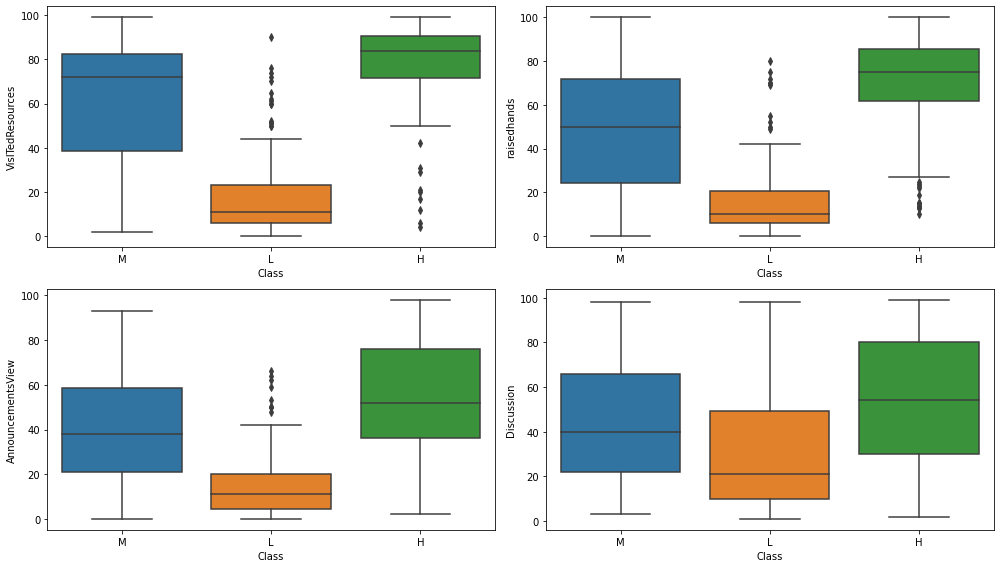

In [454]:
figs,axes = plt.subplots(2,2,figsize=(14,8))
sns.boxplot(x="Class",y="VisITedResources",data=data,ax=axes[0,0])
sns.boxplot(x="Class",y="raisedhands",data=data,ax=axes[0,1])
sns.boxplot(x="Class",y="AnnouncementsView",data=data,ax=axes[1,0])
sns.boxplot(x="Class",y="Discussion",data=data,ax=axes[1,1])

### Inside:-
* The student from L-Class visits a course content less times i.e. around 20 and the students from H-class visits maximum number of times i.e. around 80.
* The student from H-class checks the new announcements i.e.around 55 times.
* The student from H-Class raises his/her hand on classroom around 70 times.
* The student from H-Class participates more in discussion groups compared to L-class.

### Question:-4
From the above result, what are the factors that leads to get low grades of the students?

In [455]:
data_Low= data[data["Class"] == "L"]  # 127

data_Low.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
12,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,5,1,0,11,No,Bad,Above-7,L
13,M,lebanon,lebanon,MiddleSchool,G-08,A,Math,F,Father,20,14,12,19,No,Bad,Above-7,L


In [456]:
fig = px.sunburst(data_Low, path=["gender",'StageID','Semester',
                                    'ParentAnsweringSurvey','StudentAbsenceDays'])
fig.show()

* For student => Lowerlevel,First_Semester,Parent Answeing Survey=No, Abesent above 7 day have high ratio of low_grade.
* StudentAbsenceDays:- The students absent day play important role in the Grade. The low great student have high count of Absence day as compared to other grade student.
* Parents should take part in the survey as it will helpful to improve performance of child.
* AnnouncementsView :- It looks like students whoes grades are less have checked the announcement very less time as compared to student how have high grades.

In [457]:
data_num.head(2)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25


In [458]:
data_cat.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


In [459]:
data_cat.Class  = data_cat.Class.replace({"L":0, "M":1,"H":2})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [460]:
data_cat =data_cat.apply(LabelEncoder().fit_transform)
data_cat.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,1
1,1,4,4,2,1,0,7,0,0,1,1,1,1
2,1,4,4,2,1,0,7,0,0,0,0,0,0
3,1,4,4,2,1,0,7,0,0,0,0,0,0
4,1,4,4,2,1,0,7,0,0,0,0,0,1


## Final_combine dataset

In [461]:
Final_combined = pd.concat([data_num, data_cat],axis=1)
Final_combined.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,15,16,2,20,1,4,4,2,1,0,7,0,0,1,1,1,1
1,20,20,3,25,1,4,4,2,1,0,7,0,0,1,1,1,1
2,10,7,0,30,1,4,4,2,1,0,7,0,0,0,0,0,0
3,30,25,5,35,1,4,4,2,1,0,7,0,0,0,0,0,0
4,40,50,12,50,1,4,4,2,1,0,7,0,0,0,0,0,1


In [462]:
# Selecting X variable and Y_variable
X = Final_combined.drop(["Class"],axis=1)
Y =Final_combined[["Class"]]

In [463]:
#### splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [464]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Question:-5
Build classification model and present it's classification report?

### Model Building

In [465]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [466]:
X_train=pd.DataFrame(X_train,columns=['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays'])

In [467]:
y_train.reset_index(drop=True, inplace=True)

In [468]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,-0.799715,-1.007861,-0.721869,-1.320000,0.764791,-0.161103,-0.185123,-0.585206,0.453784,0.821697,1.356130,1.0,-0.819538,-1.100239,-1.176001,-1.176001,0
1,0.771654,0.696607,1.711596,1.913618,-1.307546,-0.161103,-0.185123,1.053370,-0.765987,-0.774200,1.356130,1.0,-0.819538,-1.100239,-1.176001,0.850339,1
2,0.470754,1.183598,1.749619,-0.695324,0.764791,-0.559122,-0.557586,1.053370,-1.172578,-0.774200,-0.421476,-1.0,1.220200,0.908893,0.850339,0.850339,2
3,-0.131047,-0.977424,-1.330235,-0.952544,0.764791,-0.559122,-0.557586,-0.585206,0.047194,-0.774200,-0.717744,-1.0,-0.819538,-1.100239,-1.176001,0.850339,1
4,-1.401515,-1.312230,-0.988029,-1.283255,0.764791,-0.559122,1.304728,1.053370,-1.172578,0.821697,-1.606547,-1.0,1.220200,-1.100239,0.850339,-1.176001,0


In [469]:
train["Predicted"] =model.predict(X_train)
train.head(2)

C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Predicted
0,-0.799715,-1.007861,-0.721869,-1.320000,0.764791,-0.161103,-0.185123,-0.585206,0.453784,0.821697,1.35613,1.0,-0.819538,-1.100239,-1.176001,-1.176001,0,0
1,0.771654,0.696607,1.711596,1.913618,-1.307546,-0.161103,-0.185123,1.053370,-0.765987,-0.774200,1.35613,1.0,-0.819538,-1.100239,-1.176001,0.850339,1,1


In [470]:
matrix = confusion_matrix(train['Class'], train['Predicted'])
matrix

array([[ 79,  15,   0],
       [ 15, 116,  19],
       [  0,  24,  68]], dtype=int64)

Text(0.5, 6.79999999999999, 'Predicted')

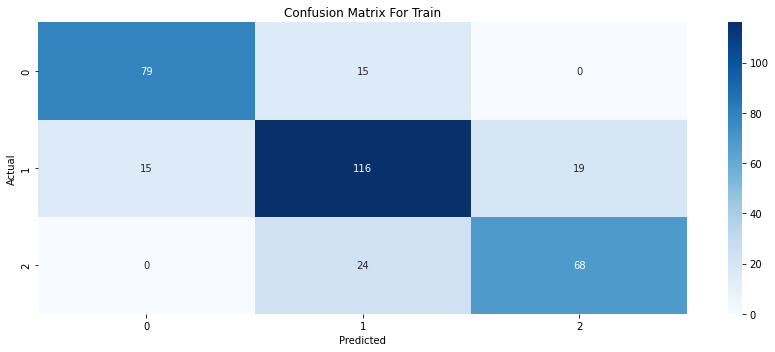

In [471]:
plt.figure(figsize=(12,5))
plt.title("Confusion Matrix For Train")
sns.heatmap(matrix,annot=True,fmt="d",cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")

### Accuracy for train

In [472]:
accuracy_score(train['Class'], train['Predicted'])

0.7827380952380952

### Test Prediction

In [473]:
X_test=pd.DataFrame(X_test,columns=['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays'])
y_test.reset_index(drop=True, inplace=True)

In [474]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0.805088,0.483549,0.342772,0.113080,-1.307546,-0.559122,-0.557586,-0.585206,0.860375,-0.7742,-0.125208,-1.0,1.220200,0.908893,0.850339,-1.176001,1
1,0.871955,-0.368685,0.342772,-0.548341,0.764791,1.032955,-0.557586,-0.585206,0.047194,-0.7742,-0.717744,1.0,1.220200,-1.100239,0.850339,0.850339,1
2,-0.131047,-0.703492,-0.911984,1.031722,-1.307546,-0.161103,-0.185123,1.053370,-0.765987,-0.7742,0.467327,-1.0,-0.819538,0.908893,-1.176001,-1.176001,1
3,-0.465381,-1.190482,-0.189549,-0.474850,0.764791,-0.559122,-0.557586,1.053370,-0.765987,-0.7742,1.356130,1.0,-0.819538,-1.100239,0.850339,-1.176001,1
4,1.406889,1.122724,1.863687,1.435924,0.764791,1.032955,0.932265,-0.585206,0.453784,-0.7742,-1.310279,-1.0,-0.819538,0.908893,0.850339,0.850339,2


In [475]:
test["Predicted"] =model.predict(X_test)
matrix_1 = confusion_matrix(test['Class'],test['Predicted'])
matrix_1

C:\Users\chaud\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



array([[32,  1,  0],
       [ 3, 42, 16],
       [ 0, 17, 33]], dtype=int64)

Text(0.5, 6.79999999999999, 'Predicted')

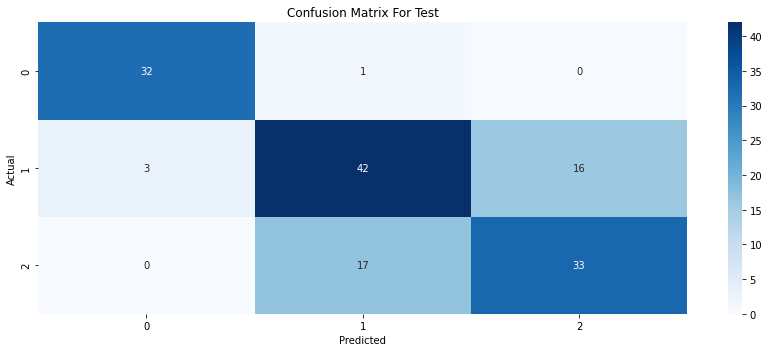

In [476]:
plt.figure(figsize=(12,5))
plt.title("Confusion Matrix For Test")
sns.heatmap(matrix_1,annot=True,fmt="d",cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")

### Accuracy for test

In [477]:
accuracy_score(test['Class'], test['Predicted'])

0.7430555555555556

### Calculation for Train data

### For Low_Grade

In [478]:
Tp =matrix[0][0]
Tn =matrix[1][1]+matrix[1][2]+matrix[2][1]+matrix[2][2]
Fp=matrix[1][0]+matrix[2][0]
Fn = matrix[0][1]+matrix[0][2]
Sensitivity = (Tp/(Tp+Fn))*100
Specificity = (Tn/(Tn+Fp))*100
print("Sensitivity for low grade is:-",round(Sensitivity,2),end="\n")
print("Specificity for low grade is:-",round(Specificity,2))

Sensitivity for low grade is:- 84.04
Specificity for low grade is:- 93.8


### For Medium_Grade

In [479]:
Tp =matrix[1][1]
Tn =matrix[0][0]+matrix[0][2]+matrix[2][0]+matrix[2][2]
Fp=matrix[0][1]+matrix[2][1]
Fn = matrix[1][0]+matrix[1][2]
Sensitivity_m = (Tp/(Tp+Fn))*100
Specificity_m = (Tn/(Tn+Fp))*100
print("Sensitivity for Medium grade is:-",round(Sensitivity_m,2),end="\n")
print("Specificity for Medium grade is:-",round(Specificity_m,2))

Sensitivity for Medium grade is:- 77.33
Specificity for Medium grade is:- 79.03


### For High_Grade

In [480]:
Tp =matrix[2][2]
Tn =matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1]
Fp=matrix[0][2]+matrix[1][2]
Fn = matrix[2][0]+matrix[2][1]
Sensitivity_h = (Tp/(Tp+Fn))*100
Specificity_h= (Tn/(Tn+Fp))*100
print("Sensitivity for high grade is:-",round(Sensitivity_h,2),end="\n")
print("Specificity for high grade is:-",round(Specificity_h,2))

Sensitivity for high grade is:- 73.91
Specificity for high grade is:- 92.21


### Calculation For Test Data

In [481]:
# for Low_Grade
Tp =matrix_1[0][0]
Tn =matrix_1[1][1]+matrix_1[1][2]+matrix_1[2][1]+matrix_1[2][2]
Fp =matrix_1[1][0]+matrix_1[2][0]
Fn =matrix_1[0][1]+matrix_1[0][2]
Sensitivity = (Tp/(Tp+Fn))*100
Specificity = (Tn/(Tn+Fp))*100
print("Sensitivity for low grade is:-",round(Sensitivity,2),end="\n")
print("Specificity for low grade is:-",round(Specificity,2))

Sensitivity for low grade is:- 96.97
Specificity for low grade is:- 97.3


In [482]:
# for medium grade
Tp =matrix_1[1][1]
Tn =matrix_1[0][0]+matrix_1[0][2]+matrix_1[2][0]+matrix_1[2][2]
Fp=matrix_1[0][1]+matrix_1[2][1]
Fn = matrix_1[1][0]+matrix_1[1][2]
Sensitivity_m = (Tp/(Tp+Fn))*100
Specificity_m = (Tn/(Tn+Fp))*100
print("Sensitivity for Medium grade is:-",round(Sensitivity_m,2),end="\n")
print("Specificity for Medium grade is:-",round(Specificity_m,2))

Sensitivity for Medium grade is:- 68.85
Specificity for Medium grade is:- 78.31


In [483]:
### for High Geade
Tp =matrix_1[2][2]
Tn =matrix_1[0][0]+matrix_1[0][1]+matrix_1[1][0]+matrix_1[1][1]
Fp=matrix_1[0][2]+matrix_1[1][2]
Fn = matrix_1[2][0]+matrix_1[2][1]
Sensitivity_h = (Tp/(Tp+Fn))*100
Specificity_h= (Tn/(Tn+Fp))*100
print("Sensitivity for high grade is:-",round(Sensitivity_h,2),end="\n")
print("Specificity for high grade is:-",round(Specificity_h,2))

Sensitivity for high grade is:- 66.0
Specificity for high grade is:- 82.98


### Interpretation

1. Accuracy for the model for training data is 78.27% and test data it will be 74.30%.
2. For Training data:-
    * Sensitivity for Low_grade,Medium_grade and High_grade are 84.08,77.33,73.91% respectively.
    * Specificity for Low_grade,Medium_grade and High_grade are 93.08,79.03,92.21% respectively.     
3. For Testing data:-
    * Sensitivity for Low_grade,Medium_grade and High_grade are 96.97,68.85,66% respectively.
    * Specificity for Low_grade,Medium_grade and High_grade are 97.03,78.31,82.98% respectively.